In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from dt_apriltags import Detector
import matplotlib.cm as cm

In [2]:
# img = cv2.imread('rov_pool.jpg')

# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
# edges = cv2.Canny(gray, 0, 150, apertureSize=3) # detect edges
# lines = cv2.HoughLinesP(
#                 edges,
#                 1,
#                 np.pi/180,
#                 100,
#                 minLineLength=100,
#                 maxLineGap=100,
#         ) # detect lines

# for line in lines:
#     x1, y1, x2, y2 = line[0]
#     cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

# plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [3]:
# cap = cv2.VideoCapture('AUV_Vid.mkv')
# ret, frame = cap.read()

# frame = cv2.imread('rov_pool.jpg')
# gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # convert to grayscale
# #edges = cv2.Canny(gray, 40, 50, apertureSize=3) # detect edges
# edges = cv2.Canny(gray, 100, 109, apertureSize=3) # detect edges
# plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))
# lines = cv2.HoughLinesP(
#                 edges,
#                 1,
#                 np.pi/180,
#                 100,
#                 minLineLength=200,
#                 maxLineGap=100,
#         ) # detect lines

# megaLines = {}

# for line in lines:
#     plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
# x1, y1, x2, y2 = line[0]
# cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
# slope = round((abs(y1-y2))/(abs(x1-x2)),1)
# if not slope in megaLines.keys():
#     megaLines[slope] = [x1, y1, x2, y2]

# if(megaLines[slope][0] < x1):
#     megaLines[slope][0] = x1

# if(megaLines[slope][1] < y1):
#     megaLines[slope][1] = y1

# if(megaLines[slope][2] < x2):
#     megaLines[slope][2] = x2

# if(megaLines[slope][3] < y2):
#     megaLines[slope][3] = y2



# for slope in megaLines:
#     print (slope)
#     print (megaLines[slope])
#     cv2.line(frame, (megaLines[slope][0], megaLines[slope][1]), (megaLines[slope][2], megaLines[slope][3]), (0, 0, 255), 2)

# plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

0.4347826086956522
slopeError:0.4347826086956522


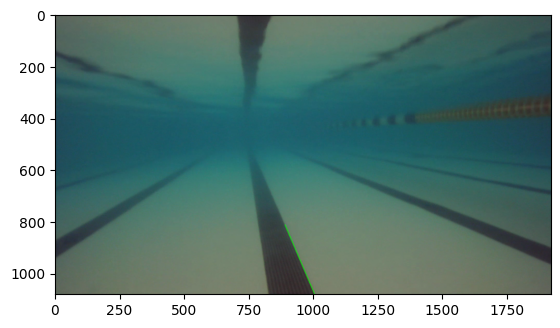

0.27027027027027023
-0.10309278350515465
slopeError:0.08358874338255778


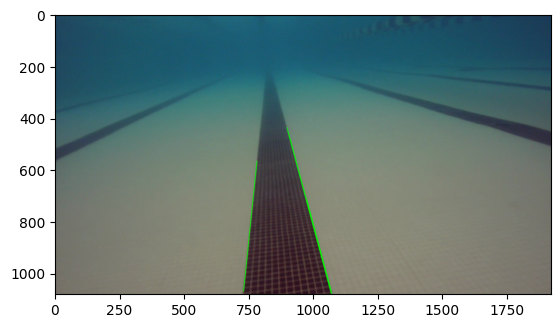

-0.3846153846153846
slopeError:-0.3846153846153846


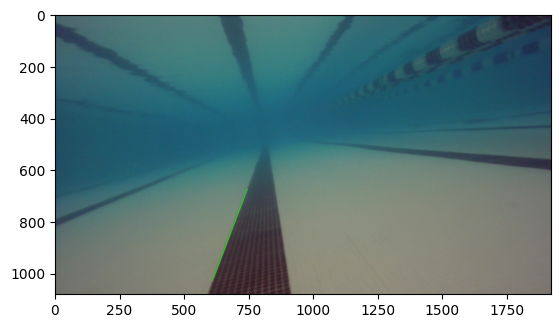

-0.5555555555555556
slopeError:-0.5555555555555556


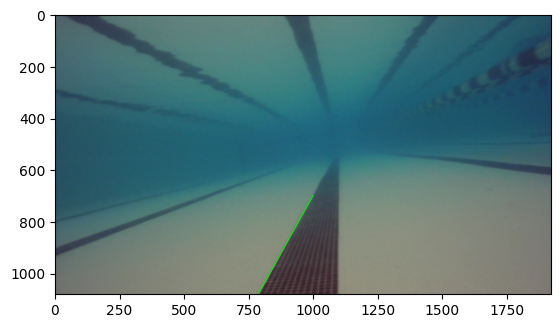

0.30303030303030304
0.24390243902439027
-0.03355704697986577
-0.03389830508474576
0.07299270072992702
0.0684931506849315
-0.08547008547008547
0.01845018450184502
-0.08849557522123894
-0.14084507042253522
-0.1923076923076923
-0.25
-0.3125
-0.3448275862068966
slopeError:-0.055359470265833086


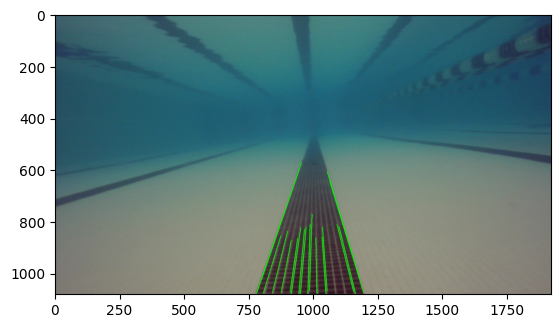

-0.47619047619047616
0.15873015873015872
slopeError:-0.15873015873015872


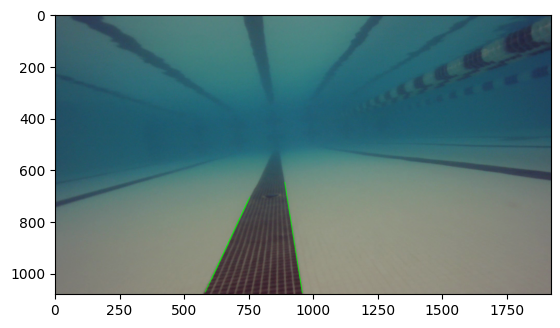

-0.3448275862068966
-1.0
slopeError:-0.6724137931034483


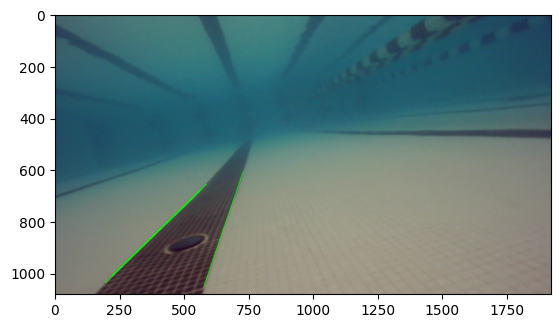

ZeroDivisionError: division by zero

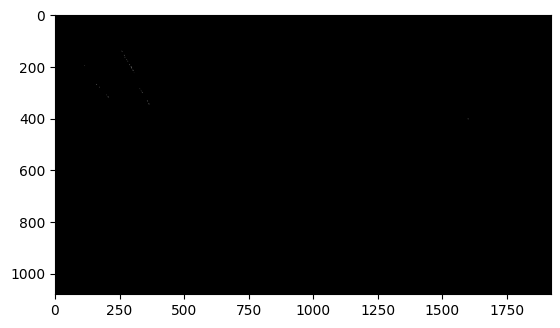

In [12]:
cap = cv2.VideoCapture('AUV_Vid.mkv')

i = 0
ret = True
while ret:
    slopeSet = set() 
    i += 1
    ret, frame = cap.read()
    if(i%50 == 0):

        #frame = cv2.imread('rov_pool.jpg')
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # convert to grayscale
        #edges = cv2.Canny(gray, 40, 50, apertureSize=3) # detect edges
        edges = cv2.Canny(gray, 100, 109, apertureSize=3) # detect edges
        plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))
        lines = cv2.HoughLinesP(
                edges,
                1,
                np.pi/180,
                100,
                minLineLength=200,
                maxLineGap=100,

        )
        try:
            for line in lines:
                #plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
                x1, y1, x2, y2 = line[0]
                cv2.line(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                slope = round((y1-y2)/(x1-x2),1)
                slopeSet.add(slope)
        except:
            pass
        slopeError = 0
        for slope in slopeSet:
            print (1/slope)
            slopeError += 1/slope
        slopeError = slopeError/len(slopeSet)
        print(f"slopeError:{slopeError}")
        if slopeError < 0 :
            print(f"Turn Right")
        else:
            print(f"Turn Left")
        
        
         
        
        
        

        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.show()
        


<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>


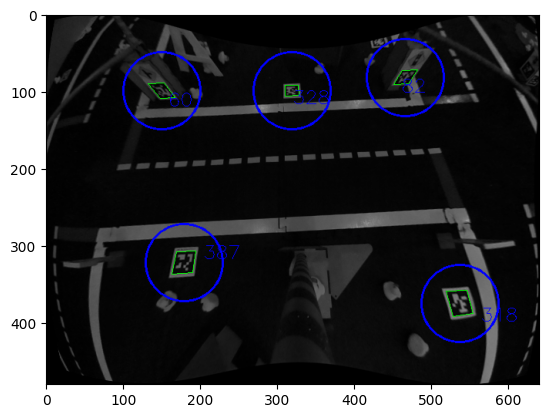

In [ ]:
img = cv2.imread('test_image.png', cv2.IMREAD_GRAYSCALE)
at_detector = Detector(families='tag36h11',
                       nthreads=1,
                       quad_decimate=1,
                       quad_sigma=0.00,
                       refine_edges=1,
                       decode_sharpening=.25,
                       debug=0)

tags = at_detector.detect(img, estimate_tag_pose=True, camera_params=([10, 100, 1, 1]), tag_size=4)

color_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

for tag in tags:
    for idx in range(len(tag.corners)):
        cv2.line(color_img, tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0))

    cv2.putText(color_img, str(tag.tag_id),
                org=(tag.corners[0, 0].astype(int) + 10, tag.corners[0, 1].astype(int) + 10),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=0.8,
                color=(0, 0, 255))
    print (type(tag.center[0].item()))
    cv2.circle(color_img, (int(tag.center[0].item()),int(tag.center[1].item())), 50, (0, 0, 255), 2)
    
    
plt.imshow(color_img)
